      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64
Mean Squared Error: 2.9077569102710896
Root Mean Squared Error: 1.7052146229349223
R^2 Score: 0.9059011844150826


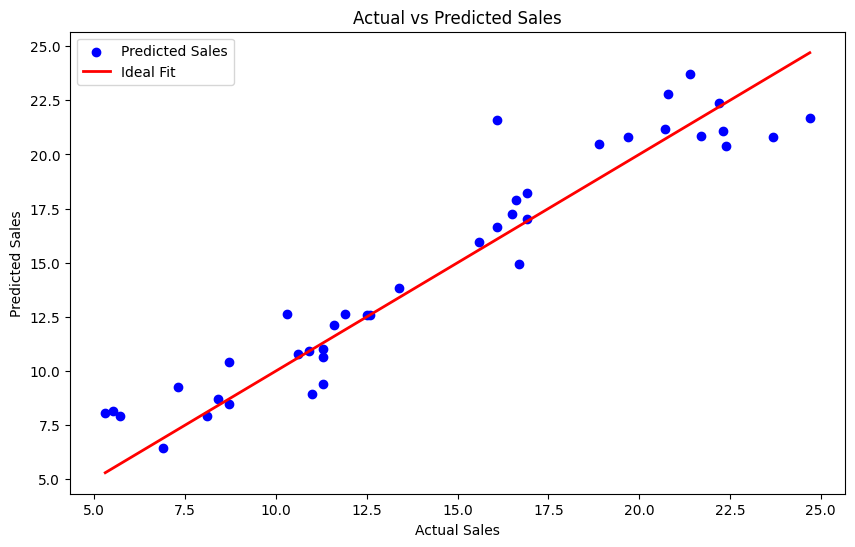

           Coefficient
TV            0.054509
Radio         0.100945
Newspaper     0.004337


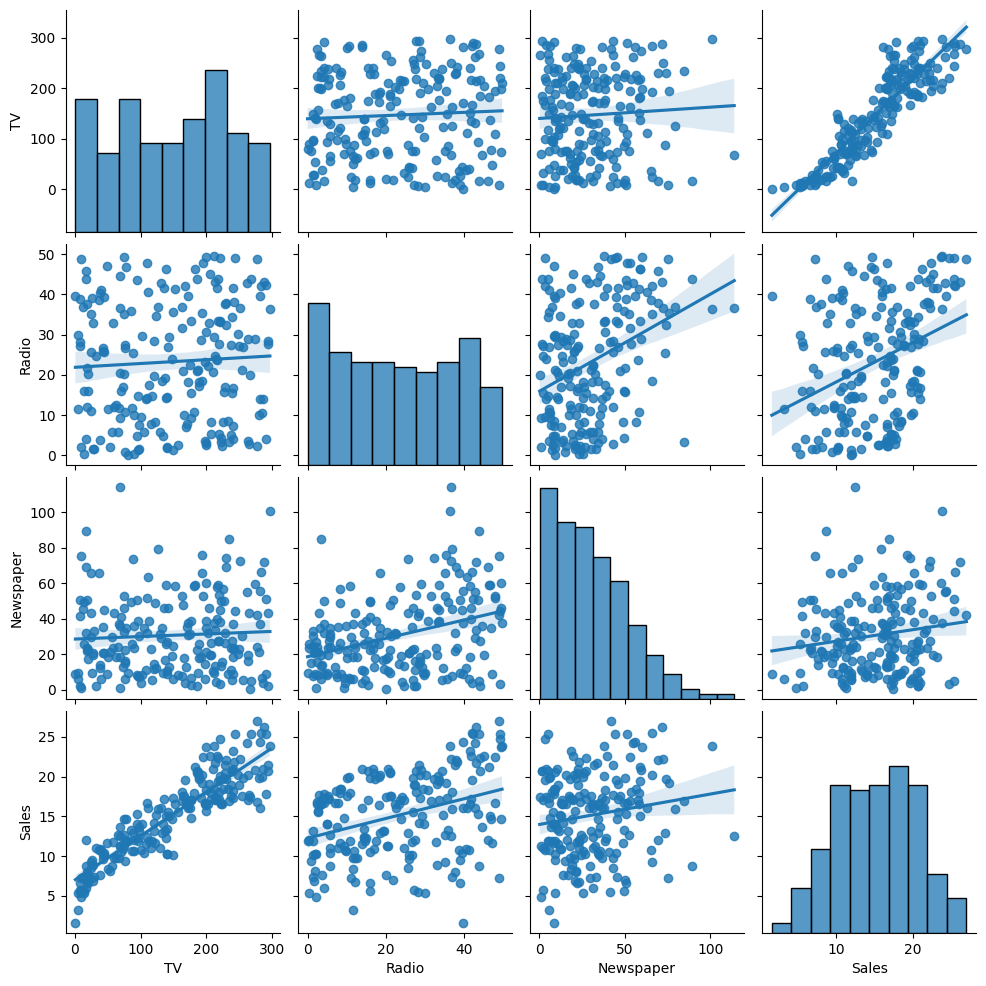

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv("/content/sample_data/advertising.csv")

# Display the first few rows of the dataset and column names
print(df.head())
print(df.columns)

# Check for missing values
print(df.isnull().sum())

# Assuming the dataset has columns 'TV', 'Radio', 'Newspaper' for advertising expenditure
# and 'Sales' for the target variable
X = df[['TV', 'Radio', 'Newspaper']]  # Use actual feature column names
y = df['Sales']  # Use actual target column name

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")

# Scatter plot of actual vs predicted sales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted Sales')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.show()

# Visualize the importance of each feature
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

# Pairplot of the features
sns.pairplot(df, kind="reg")
plt.show()

# Heatmap to show correlation between features and target
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
